# Projeto 3 - Otávio Cardoso e Guilherme Graicer

## -> Introdução

Variável escolhida : Mortalidade infantil

Problematização: De que forma a mortalidade infantil está relacionada `a quantidade de CO2 per capita e ao GDP (gross domestic produt)

### -> Dados

In [42]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/otaviocardoso/Desktop/Projeto 3


In [43]:
MORTE = pd.read_excel('MO.xlsx')
GDP = pd.read_excel('GD.xlsx')
CO2 = pd.read_excel('CO.xlsx')
dados0 = MORTE.join(GDP, how = 'outer')
dados0 = dados0.join(CO2, how = 'outer')

In [44]:
dados0.head()

,Morte,GDP,CO2
Abkhazia,NaN,NaN,NaN
Afghanistan,105.0,1637.0,0.262174
Akrotiri and Dhekelia,NaN,NaN,NaN
Albania,16.6,9374.0,1.336544
Algeria,27.4,12494.0,3.480977


In [45]:
dados0.shape

(275, 3)

In [46]:
dados=dados0[~np.isnan(dados0.Morte)]
dados=dados0[~np.isnan(dados0.GDP)]
dados=dados0[~np.isnan(dados0.CO2)]
dados.shape
dados.head()

,Morte,GDP,CO2
Afghanistan,105.0,1637.0,0.262174
Albania,16.6,9374.0,1.336544
Algeria,27.4,12494.0,3.480977
Andorra,3.3,38982.0,6.092100
Angola,182.5,7047.0,1.593918


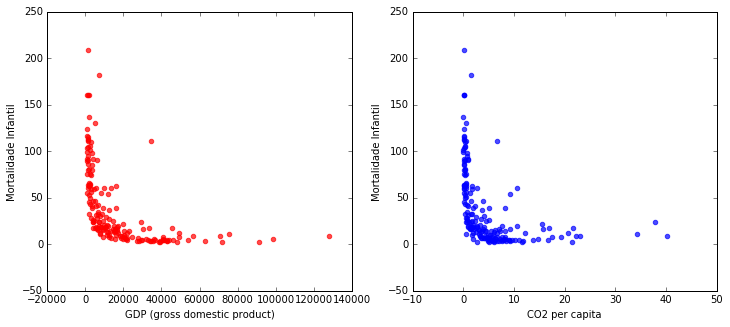

In [52]:
f, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].scatter(dados.GDP, dados.Morte, alpha=0.7, color = 'r')  # Plot the raw data
ax[0].set_xlabel("GDP (gross domestic product)")
ax[0].set_ylabel("Mortalidade Infantil")

ax[1].scatter(dados.CO2, dados.Morte, alpha=0.7, color = 'b')  # Plot the raw data
ax[1].set_xlabel("CO2 per capita")
ax[1].set_ylabel("Mortalidade Infantil")



In [58]:
np.log(dados.GDP)

Afghanistan                  7.400621
Albania                      9.145695
Algeria                      9.433004
Andorra                     10.570855
Angola                       8.860357
Anguilla                          NaN
Antigua and Barbuda          9.931443
Argentina                    9.665548
Armenia                      8.780787
Aruba                       10.412952
Australia                   10.629344
Austria                     10.665718
Azerbaijan                   9.677214
Bahamas                     10.039547
Bahrain                     10.610365
Bangladesh                   7.807510
Barbados                     9.635412
Belarus                      9.661607
Belgium                     10.615555
Belize                       9.012986
Benin                        7.400621
Bermuda                     10.940136
Bhutan                       8.782016
Bolivia                      8.571492
Bosnia and Herzegovina       9.120963
Botswana                     9.520909
Brazil      

In [57]:
np.log(dados.CO2)

Afghanistan                -1.338748
Albania                     0.290087
Algeria                     1.247313
Andorra                     1.806993
Angola                      0.466195
Anguilla                    1.458018
Antigua and Barbuda         1.755553
Argentina                   1.496569
Armenia                     0.311073
Aruba                       3.072374
Australia                   2.818536
Austria                     2.075590
Azerbaijan                  1.604814
Bahamas                     1.972170
Bahrain                     2.953786
Bangladesh                 -0.973893
Barbados                    1.704757
Belarus                     1.869326
Belgium                     2.319396
Belize                      0.302408
Benin                      -0.533993
Bermuda                     1.993338
Bhutan                     -0.420650
Bolivia                     0.442387
Bosnia and Herzegovina      2.113478
Botswana                    0.958244
Brazil                      0.766853
B

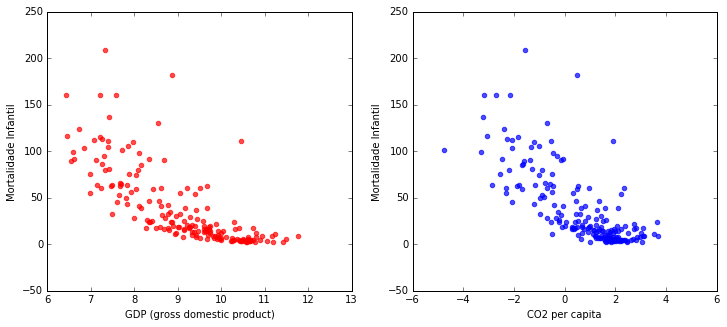

In [60]:
f, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].scatter(np.log(dados.GDP), dados.Morte, alpha=0.7, color = 'r')  # Plot the raw data
ax[0].set_xlabel("GDP (gross domestic product)")
ax[0].set_ylabel("Mortalidade Infantil")

ax[1].scatter(np.log(dados.CO2), dados.Morte, alpha=0.7, color = 'b')  # Plot the raw data
ax[1].set_xlabel("CO2 per capita")
ax[1].set_ylabel("Mortalidade Infantil")